In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report


In [ ]:
from tensorflow.keras import models, layers, optimizers, datasets, backend as K


In [ ]:
# Load MNIST dataset
(train_X, train_Y), (test_X, test_Y) = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# Initialize LabelBinarizer
lb = LabelBinarizer()

# Fit and transform the labelsp
train_Y = lb.fit_transform(train_Y)
test_Y = lb.transform(test_Y)


In [ ]:
# Initialize the model
model = models.Sequential()

# Add a dense hidden layer with sigmoid activation
model.add(layers.Dense(128, activation='sigmoid', input_shape=(28 * 28,)))

# Add the output layer with sigmoid activation for multi-class classification
model.add(layers.Dense(10, activation='sigmoid'))

# Display the model's architecture
model.summary()

# Optionally, inspect the weights of the output layer
output_layer_weights = model.layers[-1].get_weights()[0]
print("Output Layer Weights Shape:", output_layer_weights.shape)

C:\Users\Sanika\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Output Layer Weights Shape: (128, 10)


In [ ]:
# Compile the model with SGD optimizer and binary crossentropy loss
model.compile(optimizer=optimizers.SGD(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_X, train_Y,
                    epochs=20,
                    batch_size=128,
                    validation_data=(test_X, test_Y))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1396 - loss: 0.4687 - val_accuracy: 0.2518 - val_loss: 0.3207
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2902 - loss: 0.3185 - val_accuracy: 0.3899 - val_loss: 0.3129
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4078 - loss: 0.3119 - val_accuracy: 0.4667 - val_loss: 0.3075
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4826 - loss: 0.3065 - val_accuracy: 0.5318 - val_loss: 0.3023
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5395 - loss: 0.3014 - val_accuracy: 0.5823 - val_loss: 0.2971
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5815 - loss: 0.2964 - val_accuracy: 0.6128 - val_loss: 0.2920
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6133 - loss: 0.2916 - val_accuracy: 0.6377 - val_loss: 0.2870
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6353 - loss: 0.2863 - val_accuracy: 0.

In [ ]:
# Predict class probabilities
predictions = model.predict(test_X)

# Convert probabilities to class labels
predicted_classes = predictions.argmax(axis=1)
true_classes = test_Y.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


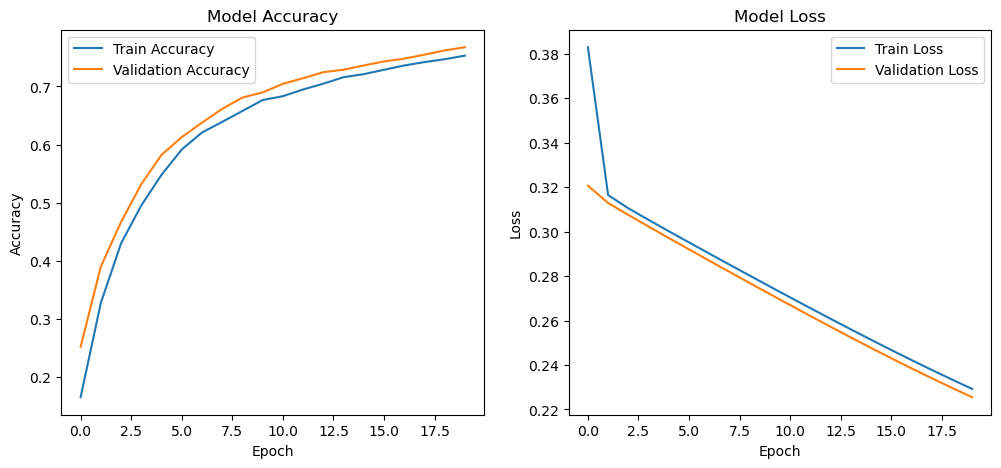

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# Generate classification report
report = classification_report(true_classes, predicted_classes)
print(report)


              precision    recall  f1-score   support

           0       0.77      0.96      0.85       980
           1       0.63      0.99      0.77      1135
           2       0.90      0.69      0.78      1032
           3       0.67      0.83      0.74      1010
           4       0.80      0.85      0.82       982
           5       0.96      0.31      0.47       892
           6       0.86      0.87      0.87       958
           7       0.76      0.87      0.81      1028
           8       0.86      0.58      0.69       974
           9       0.80      0.66      0.72      1009

    accuracy                           0.77     10000
   macro avg       0.80      0.76      0.75     10000
weighted avg       0.80      0.77      0.76     10000



# Load CIFAR-10 dataset

In [ ]:

(train_X_cifar, train_Y_cifar), (test_X_cifar, test_Y_cifar) = datasets.cifar10.load_data()

In [ ]:
# Flatten the images
train_X_cifar = train_X_cifar.reshape((train_X_cifar.shape[0], 32 * 32 * 3))
test_X_cifar = test_X_cifar.reshape((test_X_cifar.shape[0], 32 * 32 * 3))

In [ ]:
# Normalize the data to [0,1] range
train_X_cifar = train_X_cifar.astype('float32') / 255.0
test_X_cifar = test_X_cifar.astype('float32') / 255.0

In [ ]:
# Initialize LabelBinarizer
lb_cifar = LabelBinarizer()

# Fit and transform the labels
train_Y_cifar = lb_cifar.fit_transform(train_Y_cifar)
test_Y_cifar = lb_cifar.transform(test_Y_cifar)

In [ ]:
# Initialize the model for CIFAR-10
model_cifar = models.Sequential()

# Add a dense hidden layer with sigmoid activation
model_cifar.add(layers.Dense(512, activation='sigmoid', input_shape=(32 * 32 * 3,)))

# Add the output layer with sigmoid activation for multi-class classification
model_cifar.add(layers.Dense(10, activation='sigmoid'))

# Display the model's architecture
model_cifar.summary()

# Optionally, inspect the weights of the output layer
output_layer_weights_cifar = model_cifar.layers[-1].get_weights()[0]
print("CIFAR Output Layer Weights Shape:", output_layer_weights_cifar.shape)

C:\Users\Sanika\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,578,506 (6.02 MB)

 Trainable params: 1,578,506 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

CIFAR Output Layer Weights Shape: (512, 10)


In [ ]:
# Compile the model with SGD optimizer and binary crossentropy loss
model_cifar.compile(optimizer=optimizers.SGD(),
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

# Train the model
history_cifar = model_cifar.fit(train_X_cifar, train_Y_cifar,
                                epochs=20,
                                batch_size=128,
                                validation_data=(test_X_cifar, test_Y_cifar))


Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.1292 - loss: 0.3587 - val_accuracy: 0.1715 - val_loss: 0.3209
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.1749 - loss: 0.3200 - val_accuracy: 0.1985 - val_loss: 0.3169
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.2081 - loss: 0.3162 - val_accuracy: 0.2322 - val_loss: 0.3136
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.2375 - loss: 0.3131 - val_accuracy: 0.2506 - val_loss: 0.3107
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.2549 - loss: 0.3103 - val_accuracy: 0.2705 - val_loss: 0.3083
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.2649 - loss: 0.3081 - val_accuracy: 0.2754 - val_loss: 0.3061
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.2719 - loss: 0.3060 - val_accuracy: 0.2923 - val_loss: 0.3042
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.2813 - loss: 0.3041 - val_accu

In [ ]:
# Predict class probabilities
predictions_cifar = model_cifar.predict(test_X_cifar)

# Convert probabilities to class labels
predicted_classes_cifar = predictions_cifar.argmax(axis=1)
true_classes_cifar = test_Y_cifar.argmax(axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


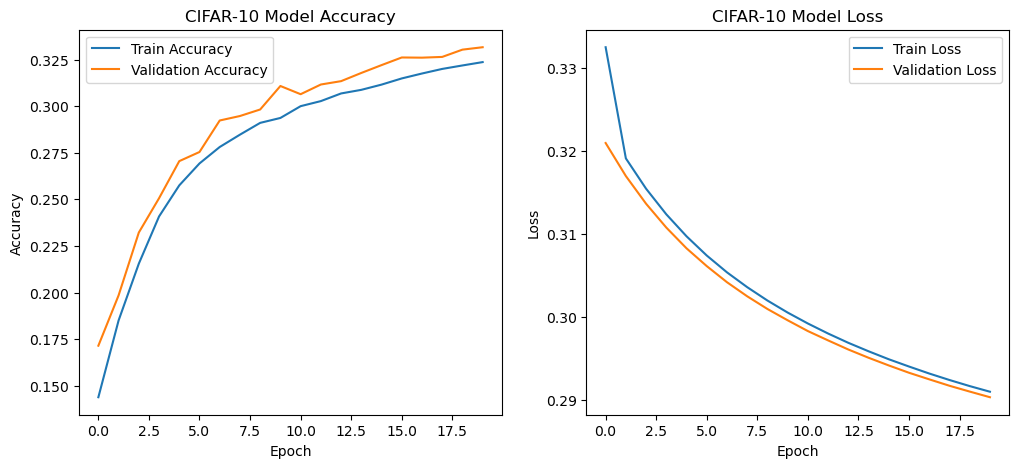

In [ ]:
# Plot training & validation accuracy values for CIFAR-10
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(history_cifar.history['accuracy'], label='Train Accuracy')
plt.plot(history_cifar.history['val_accuracy'], label='Validation Accuracy')
plt.title('CIFAR-10 Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values for CIFAR-10
plt.subplot(1, 2, 2)
plt.plot(history_cifar.history['loss'], label='Train Loss')
plt.plot(history_cifar.history['val_loss'], label='Validation Loss')
plt.title('CIFAR-10 Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
# Generate classification report for CIFAR-10
report_cifar = classification_report(true_classes_cifar, predicted_classes_cifar)
print(report_cifar)


              precision    recall  f1-score   support

           0       0.37      0.52      0.43      1000
           1       0.39      0.26      0.31      1000
           2       0.30      0.13      0.18      1000
           3       0.26      0.06      0.09      1000
           4       0.31      0.22      0.26      1000
           5       0.29      0.38      0.33      1000
           6       0.31      0.53      0.39      1000
           7       0.31      0.23      0.26      1000
           8       0.39      0.49      0.43      1000
           9       0.34      0.51      0.41      1000

    accuracy                           0.33     10000
   macro avg       0.32      0.33      0.31     10000
weighted avg       0.32      0.33      0.31     10000

